# PCA - Principle Component Analysis

## **Orthogonal vs Non-orthogonal**
---

**Orthogonal = Perpendicular = Indepdent = No-Correlation**

Let's go step by step with a concrete example that shows how non-orthogonal axes make coordinate representation more complex compared to an orthogonal system.

### **Example: A Simple 2D Orthogonal System ($S1$)**
In a standard **Cartesian coordinate system** (orthogonal axes), representing a point is straightforward.

Suppose we have the basis vectors:
> \$
\mathbf{e_1} = (1, 0), \quad \mathbf{e_2} = (0, 1)
\$

These are orthogonal (perpendicular to each other) because their dot product is:
> \$
\mathbf{e_1} \cdot \mathbf{e_2} = 1 \times 0 + 0 \times 1 = 0
\$

and any point $\mathbf{p} = (x, y)$ can be represented uniquely as:

> \$
\mathbf{p} = x \mathbf{e_1} + y \mathbf{e_2}
\$

For example, if $ \mathbf{p} = (3, 2) $, then:

> \$
\mathbf{p} = 3(1, 0) + 2(0,1) = (3,2)
\$

Each coordinate directly corresponds to movement along one of the axes, with no interference.

---

### **Example: A Non-Orthogonal System ($S2$)**
Now, consider a new coordinate system where the basis vectors **are not perpendicular**. Let's define:

> \$
\mathbf{v_1} = (1, 0), \quad \mathbf{v_2} = (1, 1)
\$

These vectors are **not orthogonal** because their dot product is:
> \$
\mathbf{v_1} \cdot \mathbf{v_2} = 1 \times 1 + 0 \times 1 = 1 \neq 0
\$

Now, let's try to represent the same point $ \mathbf{p} = (3,2) $ from $S1$ in this new system $S2$.

We need to find coefficients $ a $ and $ b $ such that:

> \$
\mathbf{p} = a \mathbf{v_1} + b \mathbf{v_2}
\$

Expanding:

> \$
(3,2) = a(1,0) + b(1,1)
\$

This gives two equations:

1. $ a + b = 3 $ (from the x-coordinates)
2. $ b = 2 $ (from the y-coordinates)

Solving for $ a $:

> \$
a = 3 - b = 3 - 2 = 1
\$

Thus, in this new coordinate system, the representation of $ \mathbf{p} $ is:

> \$
(1, 2)_{S2}
\$

However, notice that the second basis vector $ \mathbf{v_2} = (1,1) $ **contributes to both the $\mathbf{e_1}$- and $\mathbf{e_2}$-coordinates in $S1$**. This means that changing one coordinate affects both dimensions, making computations more complex.

---

### **Why Does This Matter in PCA?**
- PCA finds new **orthogonal** axes (principal components) so that the transformed coordinates are **uncorrelated** and simpler to interpret.
- Without orthogonality, movements along one axis **affect the other**, making the system harder to work with.
- The transformation in PCA ensures that the **principal components (new axes) are orthogonal**, eliminating such interdependencies.



## PCA Approach - Numerical Example
---
Orthogonal Decomposition Using Egigenvactors

**Compute eigenvectors** for the **orthogonal decomposition** of data.

### **Step 1: Define a Simple 2D Dataset**
Consider a small dataset with two features:

> \$
X = \begin{bmatrix} 
2 & 3 \\ 
3 & 5 \\ 
5 & 8 \\ 
7 & 10
\end{bmatrix}
\$

Each row represents a data point, and the two columns represent two features.

---

### **Step 2: Center the Data**
PCA works on **mean-centered** data, so we subtract the mean of each column:

> \$
\text{Mean} = \begin{bmatrix} 4.25 & 6.5 \end{bmatrix}
\$

> \$
X_{\text{centered}} = X - \text{Mean} =
\begin{bmatrix} 
-2.25 & -3.5 \\ 
-1.25 & -1.5 \\ 
0.75 & 1.5 \\ 
2.75 & 3.5
\end{bmatrix}
\$

---

### **Step 3: Compute the Covariance Matrix**
The covariance matrix is given by:

> \$
\Sigma = \frac{1}{n-1} X_{\text{centered}}^T X_{\text{centered}}
\$

Computing this:

> \$
\Sigma =
\begin{bmatrix} 
4.92 & 6.56 \\ 
6.56 & 8.67
\end{bmatrix}
\$

---

### **Step 4: Compute Eigenvectors and Eigenvalues**
Solving $ \Sigma v = \lambda v $ (eigenvalue equation):

> \$
\text{Eigenvalues: } \lambda_1 = 13.73, \quad \lambda_2 = 0.86
\$

> \$
\text{Eigenvectors: } 
V = \begin{bmatrix} 0.66 & -0.75 \\ 0.75 & 0.66 \end{bmatrix}
\$

Each **column** of $ V $ is an **eigenvector**.

---

### **Step 5: Map Eigenvectors to Data Decomposition**
- The **first eigenvector** $ (0.66, 0.75) $ corresponds to the direction of **maximum variance**.
- The **second eigenvector** $ (-0.75, 0.66) $ is **orthogonal** to the first and represents the remaining variance.

Each data point is projected onto this new basis:

> \$
X' = X_{\text{centered}} V
\$

This gives a transformed dataset where:
- The first column captures the most variance.
- The second column captures the remaining, orthogonal variance.

---

### **Key Insights**
1. **Eigenvectors define new axes** that are **orthogonal** and align with variance directions.
2. **Orthogonality ensures decorrelation** between new features.
3. **Data decomposition**: Each original data point can be expressed as a **linear combination** of eigenvectors, providing an efficient way to represent data in a lower-dimensional space.

## PCA in Action - Generated Data
---
Here's Python code to generate a 2D dataset where the two features are not orthogonal (i.e., they are correlated).

* Using sklearn.PCA

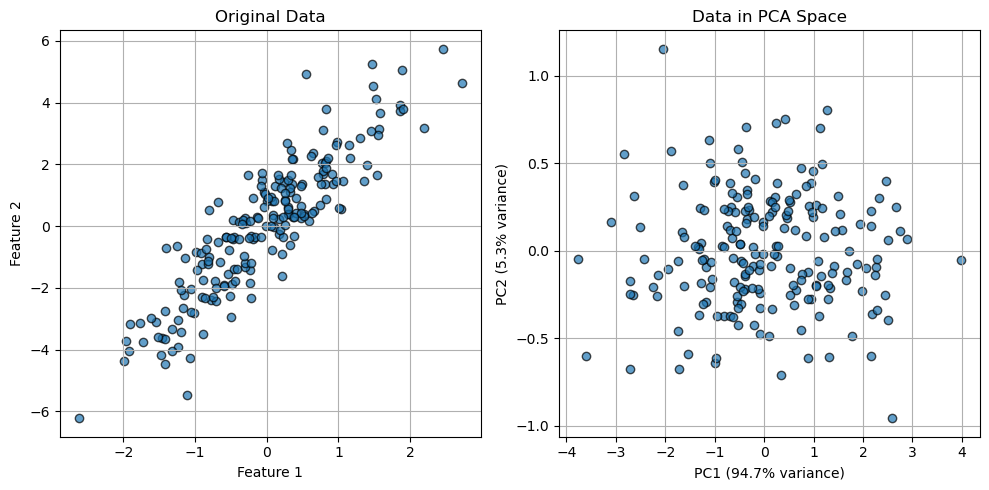

Principal Component Directions (Feature Loadings):
PC1: [-0.71 -0.71]
PC2: [-0.71  0.71]


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a 2D dataset with correlated features
np.random.seed(42)
n_samples = 200

# Feature 1 (independent random variable)
x1 = np.random.normal(0, 1, n_samples)

# Feature 2 (correlated with Feature 1)
x2 = 2 * x1 + np.random.normal(0, 1, n_samples)

# Combine features into a dataset
data = np.vstack((x1, x2)).T

# Step 2: Visualize the original data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], alpha=0.7, edgecolors='k')
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()

# Step 3: Apply PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Standardize the data for PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Step 4: Visualize the data in PCA-transformed space
plt.subplot(1, 2, 2)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, edgecolors='k')
plt.title("Data in PCA Space")
plt.xlabel(f"PC1 ({explained_variance[0]:.1%} variance)")
plt.ylabel(f"PC2 ({explained_variance[1]:.1%} variance)")
plt.grid()

# Show the plots
plt.tight_layout()
plt.show()

# Print PCA directions (principal components)
print("Principal Component Directions (Feature Loadings):")
for i, component in enumerate(pca.components_):
    print(f"PC{i+1}: {component.round(2)}")

### Observation

- Data after PCA is more scattered
- Primary purpose of PCA is not necessarily to make data visually "structured" or "clustered," but to reorient the data into a new coordinate system that emphasizes variance in descending order.

### Key Insights from the Experiment:

1. **Original Data vs. PCA-Transformed Data**:
   - In the original data, the features are correlated, so the points naturally align along a linear trend, forming an elongated cluster in the 2D space.
   - After PCA, the data is rotated into a new coordinate system where the axes (PC1 and PC2) represent the directions of maximum variance and are orthogonal (uncorrelated). This "decouples" the correlation between features, which can make the data appear more scattered.

2. **PCA's Purpose**:
   - PCA is **not always intended to improve visual separability or clustering** directly. Instead, it transforms the data into a space where the most significant sources of variance are isolated.
   - By projecting data into fewer dimensions (e.g., 2D from higher dimensions), PCA aims to retain as much variance as possible, which may or may not result in visually separable clusters.

### Practical Takeaways:
- **Use PCA when**:
  - Reducing dimensionality to simplify models or speed up computations.
  - Highlighting dominant trends or patterns in high-dimensional data.
  - Visualizing high-dimensional data in 2D or 3D space to observe trends (though separability isn’t guaranteed).

- **Consider alternatives**:
  - For clustering tasks, methods like **t-SNE** or **UMAP** are often better for visualizing separability, as they aim explicitly to preserve local or global structure in a reduced-dimensional space.
  - We'll discuss this later this week.


## Dimension Reduction vs Data Separation
---
Let’s construct an example where PCA effectively highlights separability in the data. We will create a 3D dataset with distinct clusters that are initially overlapping or aligned in an awkward way, making visual separation difficult. After applying PCA to reduce the data to 2D, let's observe if the clusters will become more separable.

### Expected Results:
- The original 3D plot will show clusters that are hard to distinguish visually.
- The PCA-transformed 2D plot will highlight the separability (?) between the clusters, demonstrating how PCA can help emphasize dominant structures in the data.

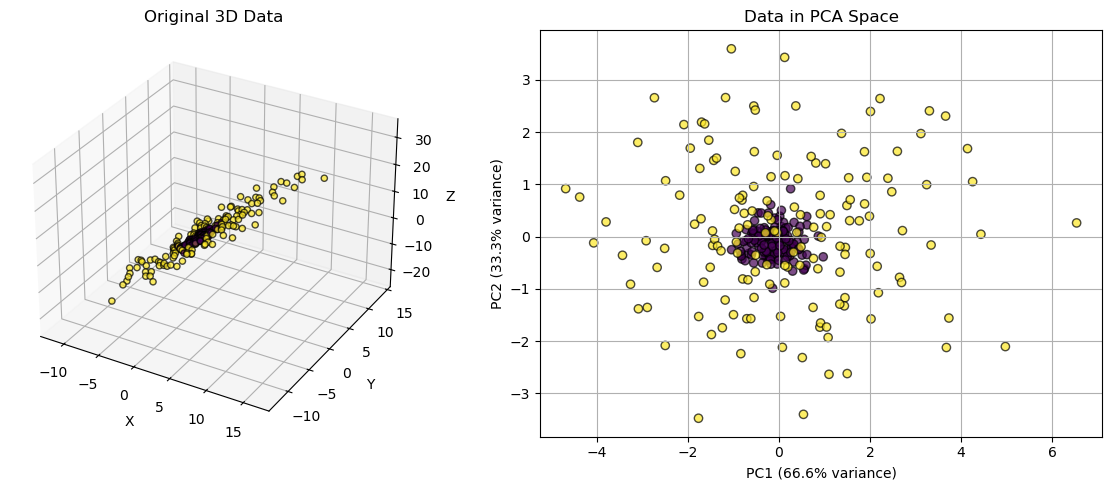

Explained Variance Ratio: [0.66591047 0.33332679]
Principal Components (Feature Loadings):
PC1: [ 0.71 -0.01  0.71]
PC2: [0.   1.   0.01]


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Generate a 3D dataset with overlapping clusters
np.random.seed(42)
n_samples = 150

# Cluster 1
x1 = np.random.normal(0, 1, n_samples)
y1 = np.random.normal(0, 1, n_samples)
z1 = 2 * x1 + np.random.normal(0, 0.5, n_samples)

# Cluster 2
#x2 = np.random.normal(5, 1, n_samples)
#y2 = np.random.normal(5, 1, n_samples)
x2 = np.random.normal(1, 5, n_samples)
y2 = np.random.normal(1, 5, n_samples)
z2 = 2 * x2 + np.random.normal(0, 0.5, n_samples)

# Combine clusters
data_3d = np.vstack((
    np.column_stack((x1, y1, z1)),
    np.column_stack((x2, y2, z2))
))

labels = np.array([0] * n_samples + [1] * n_samples)  # Labels for clusters

# Step 2: Visualize the original 3D data
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
ax.set_title("Original 3D Data")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Step 3: Apply PCA to reduce to 2D
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_3d)
pca = PCA(n_components=2)
data_2d_pca = pca.fit_transform(data_scaled)

# Step 4: Visualize the PCA-transformed 2D data
plt.subplot(1, 2, 2)
plt.scatter(data_2d_pca[:, 0], data_2d_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title("Data in PCA Space")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.grid()

plt.tight_layout()
plt.show()

# Print PCA components and explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Principal Components (Feature Loadings):")
for i, component in enumerate(pca.components_):
    print(f"PC{i+1}: {component.round(2)}")

## PCA on Real Dataset
---
Let's apply PCA for dimensionality reduction and then use clustering to analyze real-world data. A commonly used dataset for such purposes is the Iris dataset. This dataset has 4 features: sepal length, sepal width, petal length, and petal width, measured for 3 types of Iris flowers (setosa, versicolor, virginica).

Steps
- Load and preprocess the Iris dataset.
- Apply PCA to reduce dimensions from 4D to 2D.
- Visualize the data in the reduced 2D space.
- Apply clustering (e.g., K-means) to the reduced data and visualize the clusters.

Explained variance by each principal component:
[0.72962445 0.22850762]


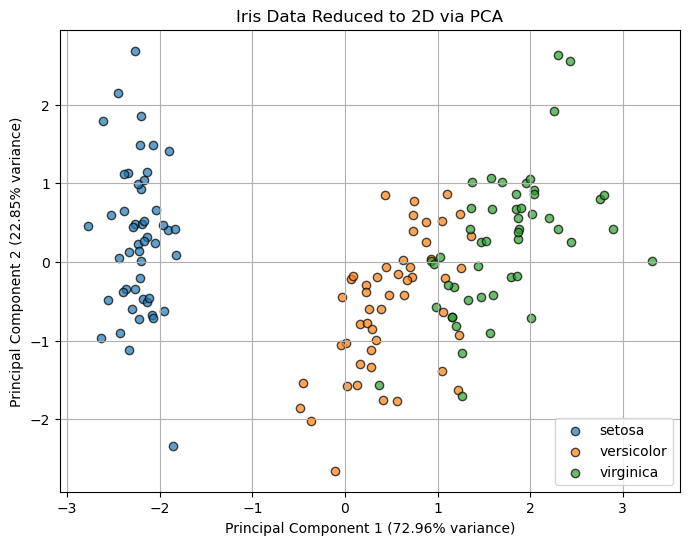

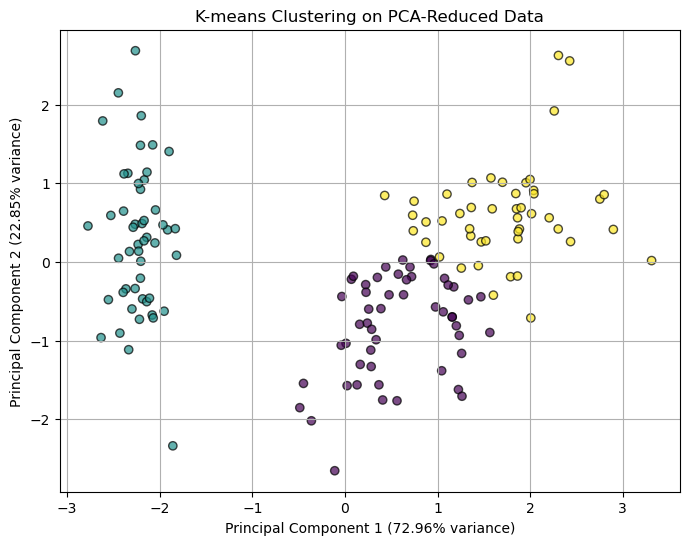

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load the dataset
iris = load_iris()
X = iris.data  # Features: Sepal length, Sepal width, Petal length, Petal width
y = iris.target  # Target: Flower species
feature_names = iris.feature_names
target_names = iris.target_names

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

print("Explained variance by each principal component:")
print(explained_variance)

# 4. Visualize the data in the reduced space
plt.figure(figsize=(8, 6))
for i, target_name in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, alpha=0.7, edgecolor='k'
    )
plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}% variance)")
plt.title("Iris Data Reduced to 2D via PCA")
plt.legend()
plt.grid()
plt.show()

# 5. Apply K-means clustering on the reduced data
#kmeans = KMeans(n_clusters=3, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=30)
#kmeans = KMeans(n_clusters=3, n_init=50, random_state=24)
kmeans.fit(X_pca)
clusters = kmeans.labels_

# 6. Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", alpha=0.7, edgecolor='k'
)
plt.xlabel(f"Principal Component 1 ({explained_variance[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({explained_variance[1]*100:.2f}% variance)")
plt.title("K-means Clustering on PCA-Reduced Data")
plt.grid()
plt.show()
